In [3]:
# Cell 1: Import Libraries and Load Training Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Load training lifestyle features (for clustering)
train_data = pd.read_csv('../data/train/train_lifestyle_features.csv')

print("Training data loaded successfully")
print(f"Shape: {train_data.shape[0]} rows, {train_data.shape[1]} columns")
print(f"\nColumns: {train_data.columns.tolist()}")
print("\nFirst 5 rows:")
display(train_data.head())

Training data loaded successfully
Shape: 35000 rows, 7 columns

Columns: ['Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption']

First 5 rows:


,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption
0,0.083333,0.42,0.0,0.654545,0.0,0.000000,0.666667
1,0.916667,0.70,1.0,0.654545,0.0,0.333333,1.000000
2,0.333333,0.76,0.7,0.527273,1.0,0.333333,0.000000
3,0.800000,0.62,0.3,0.909091,0.0,0.000000,0.000000
4,0.800000,0.00,1.0,0.472727,1.0,0.333333,1.000000


In [4]:
# Cell 2: Verify Data Quality
print("=" * 80)
print("DATA QUALITY VERIFICATION")
print("=" * 80)

# Check for missing values
print(f"\n1. Missing values: {train_data.isnull().sum().sum()}")

# Check data types
print("\n2. Data types:")
print(train_data.dtypes)

# Check value ranges (should all be [0, 1] from normalization)
print("\n3. Feature ranges:")
for col in train_data.columns:
    print(f"   {col}: [{train_data[col].min():.6f}, {train_data[col].max():.6f}]")

# Summary statistics
print("\n4. Summary statistics:")
display(train_data.describe())

DATA QUALITY VERIFICATION

1. Missing values: 0

2. Data types:
Sleep_Hours                float64
Work_Hours                 float64
Physical_Activity_Hours    float64
Social_Media_Usage         float64
Diet_Quality               float64
Smoking_Habit              float64
Alcohol_Consumption        float64
dtype: object

3. Feature ranges:
   Sleep_Hours: [0.000000, 1.000000]
   Work_Hours: [0.000000, 1.000000]
   Physical_Activity_Hours: [0.000000, 1.000000]
   Social_Media_Usage: [0.000000, 1.000000]
   Diet_Quality: [0.000000, 1.000000]
   Smoking_Habit: [0.000000, 1.000000]
   Alcohol_Consumption: [0.000000, 1.000000]

4. Summary statistics:


,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,0.502800,0.499902,0.497266,0.498497,0.499257,0.499048,0.499495
std,0.288919,0.293826,0.315859,0.288833,0.408119,0.372605,0.372811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.240000,0.200000,0.254545,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.490909,0.500000,0.333333,0.666667
75%,0.750000,0.760000,0.800000,0.745455,1.000000,0.666667,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


SILHOUETTE SCORE ANALYSIS

Calculating silhouette scores for k=2 to k=10...
k=2: Silhouette Score = 0.1477
k=3: Silhouette Score = 0.1405
k=4: Silhouette Score = 0.1321
k=5: Silhouette Score = 0.1269
k=6: Silhouette Score = 0.1365
k=7: Silhouette Score = 0.1317
k=8: Silhouette Score = 0.1258
k=9: Silhouette Score = 0.1180
k=10: Silhouette Score = 0.1250

OPTIMAL K DETERMINATION

Optimal number of clusters: k=2
Silhouette Score: 0.1477


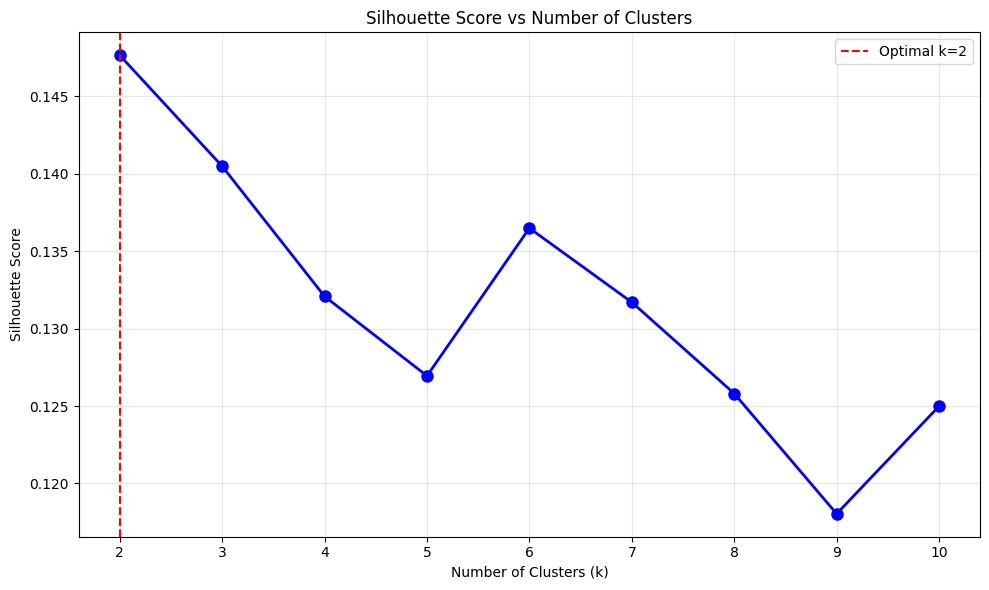

In [5]:
# Cell 3: Determine Optimal Number of Clusters - Silhouette Score
print("=" * 80)
print("SILHOUETTE SCORE ANALYSIS")
print("=" * 80)

# Test k from 2 to 10
k_range = range(2, 11)
silhouette_scores = []

print("\nCalculating silhouette scores for k=2 to k=10...")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(train_data)
    silhouette_avg = silhouette_score(train_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"k={k}: Silhouette Score = {silhouette_avg:.4f}")

# Find optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
optimal_score = max(silhouette_scores)

print("\n" + "=" * 80)
print("OPTIMAL K DETERMINATION")
print("=" * 80)
print(f"\nOptimal number of clusters: k={optimal_k}")
print(f"Silhouette Score: {optimal_score:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

FITTING K-MEANS WITH k=2

K-Means model fitted successfully
Number of clusters: 2
Number of training samples: 35000

CLUSTER DISTRIBUTION - TRAINING SET

Cluster sizes:
  Cluster 0: 17510 samples (50.03%)
  Cluster 1: 17490 samples (49.97%)


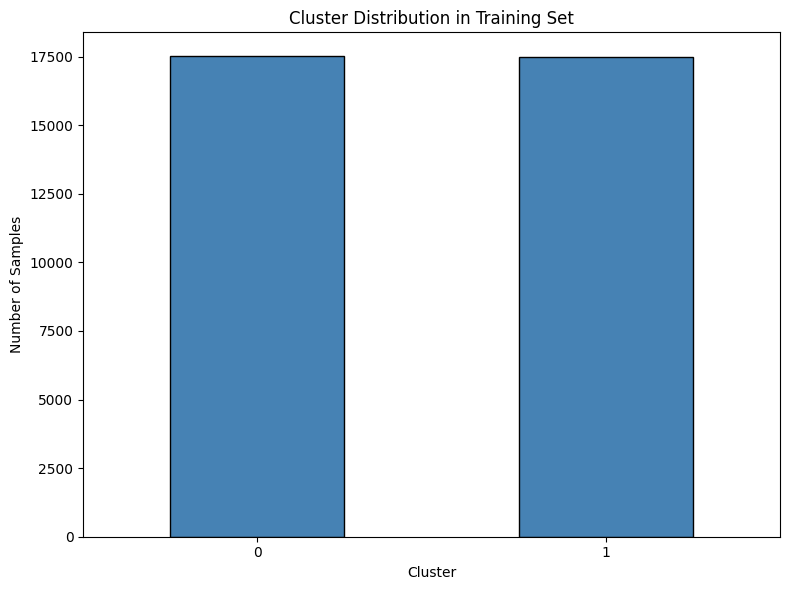

In [6]:
# Cell 4: Fit K-Means with Optimal k
print("=" * 80)
print(f"FITTING K-MEANS WITH k={optimal_k}")
print("=" * 80)

# Fit K-Means on training data
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
train_clusters = kmeans_final.fit_predict(train_data)

print(f"\nK-Means model fitted successfully")
print(f"Number of clusters: {optimal_k}")
print(f"Number of training samples: {len(train_clusters)}")

# Cluster distribution
print("\n" + "=" * 80)
print("CLUSTER DISTRIBUTION - TRAINING SET")
print("=" * 80)

cluster_counts = pd.Series(train_clusters).value_counts().sort_index()
cluster_percent = pd.Series(train_clusters).value_counts(normalize=True).sort_index() * 100

print("\nCluster sizes:")
for cluster_id in range(optimal_k):
    print(f"  Cluster {cluster_id}: {cluster_counts[cluster_id]} samples ({cluster_percent[cluster_id]:.2f}%)")

# Visualization
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.title('Cluster Distribution in Training Set')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

CLUSTER PROFILING

Mean lifestyle feature values per cluster:


,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Social_Media_Usage,Diet_Quality,Smoking_Habit,Alcohol_Consumption
Cluster,,,,,,,
0,0.505513,0.500121,0.498915,0.496710,0.832182,0.498877,0.612222
1,0.500085,0.499682,0.495615,0.500286,0.165952,0.499219,0.386640


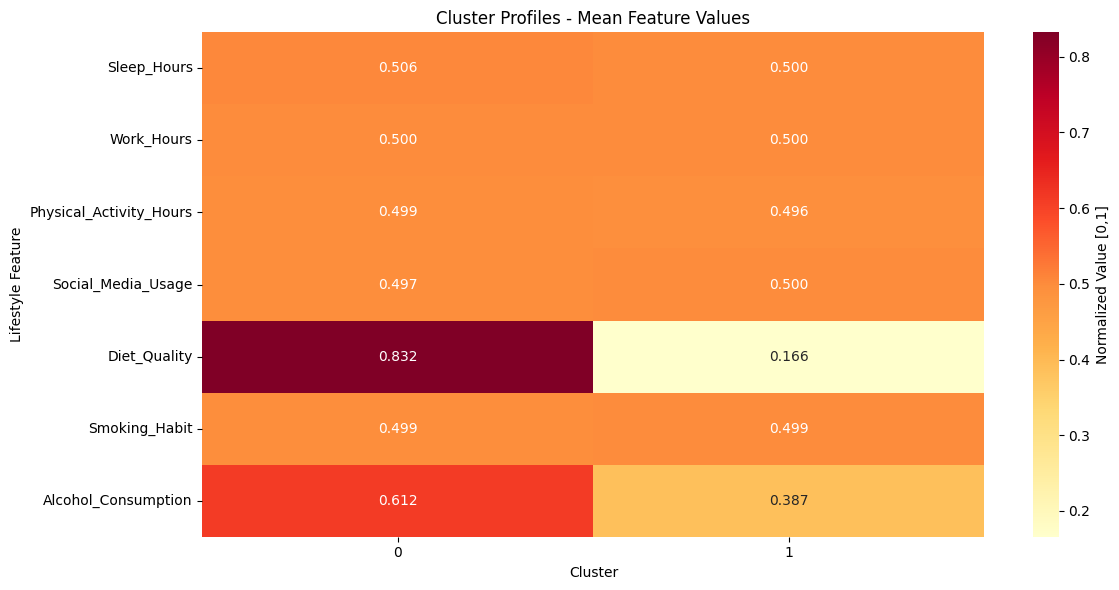


CLUSTER DESCRIPTIONS

Cluster 0:
  Top characteristics:
    - Diet_Quality: 0.832
    - Alcohol_Consumption: 0.612
    - Sleep_Hours: 0.506
  Low characteristics:
    - Social_Media_Usage: 0.497
    - Smoking_Habit: 0.499
    - Physical_Activity_Hours: 0.499

Cluster 1:
  Top characteristics:
    - Social_Media_Usage: 0.500
    - Sleep_Hours: 0.500
    - Work_Hours: 0.500
  Low characteristics:
    - Diet_Quality: 0.166
    - Alcohol_Consumption: 0.387
    - Physical_Activity_Hours: 0.496


In [7]:
# Cell 5: Cluster Profiling - Lifestyle Patterns
print("=" * 80)
print("CLUSTER PROFILING")
print("=" * 80)

# Add cluster labels to training data for profiling
train_with_clusters = train_data.copy()
train_with_clusters['Cluster'] = train_clusters

# Calculate mean values for each cluster
cluster_profiles = train_with_clusters.groupby('Cluster').mean()

print("\nMean lifestyle feature values per cluster:")
display(cluster_profiles)

# Visualization - Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profiles.T, annot=True, fmt='.3f', cmap='YlOrRd', 
            cbar_kws={'label': 'Normalized Value [0,1]'})
plt.xlabel('Cluster')
plt.ylabel('Lifestyle Feature')
plt.title('Cluster Profiles - Mean Feature Values')
plt.tight_layout()
plt.show()

# Describe each cluster
print("\n" + "=" * 80)
print("CLUSTER DESCRIPTIONS")
print("=" * 80)

for cluster_id in range(optimal_k):
    print(f"\nCluster {cluster_id}:")
    cluster_profile = cluster_profiles.loc[cluster_id]
    
    # Identify defining characteristics (highest values)
    top_features = cluster_profile.nlargest(3)
    print(f"  Top characteristics:")
    for feature, value in top_features.items():
        print(f"    - {feature}: {value:.3f}")
    
    # Identify low characteristics
    low_features = cluster_profile.nsmallest(3)
    print(f"  Low characteristics:")
    for feature, value in low_features.items():
        print(f"    - {feature}: {value:.3f}")

In [9]:
# Cell 6: Assign Clusters to Validation and Test Sets
print("=" * 80)
print("ASSIGNING CLUSTERS TO VALIDATION AND TEST SETS")
print("=" * 80)

# Load validation and test data
val_data = pd.read_csv('../data/validate/val_lifestyle_features.csv')
test_data = pd.read_csv('../data/test/test_lifestyle_features.csv')

print(f"\nValidation set loaded: {val_data.shape[0]} rows")
print(f"Test set loaded: {test_data.shape[0]} rows")

# Predict cluster labels using the trained model
val_clusters = kmeans_final.predict(val_data)
test_clusters = kmeans_final.predict(test_data)

print("\nCluster assignment complete")

# Cluster distribution in validation set
print("\n" + "=" * 80)
print("CLUSTER DISTRIBUTION - VALIDATION SET")
print("=" * 80)

val_cluster_counts = pd.Series(val_clusters).value_counts().sort_index()
val_cluster_percent = pd.Series(val_clusters).value_counts(normalize=True).sort_index() * 100

print("\nCluster sizes:")
for cluster_id in range(optimal_k):
    print(f"  Cluster {cluster_id}: {val_cluster_counts[cluster_id]} samples ({val_cluster_percent[cluster_id]:.2f}%)")

# Cluster distribution in test set
print("\n" + "=" * 80)
print("CLUSTER DISTRIBUTION - TEST SET")
print("=" * 80)

test_cluster_counts = pd.Series(test_clusters).value_counts().sort_index()
test_cluster_percent = pd.Series(test_clusters).value_counts(normalize=True).sort_index() * 100

print("\nCluster sizes:")
for cluster_id in range(optimal_k):
    print(f"  Cluster {cluster_id}: {test_cluster_counts[cluster_id]} samples ({test_cluster_percent[cluster_id]:.2f}%)")

ASSIGNING CLUSTERS TO VALIDATION AND TEST SETS

Validation set loaded: 10000 rows
Test set loaded: 5000 rows

Cluster assignment complete

CLUSTER DISTRIBUTION - VALIDATION SET

Cluster sizes:
  Cluster 0: 5038 samples (50.38%)
  Cluster 1: 4962 samples (49.62%)

CLUSTER DISTRIBUTION - TEST SET

Cluster sizes:
  Cluster 0: 2552 samples (51.04%)
  Cluster 1: 2448 samples (48.96%)


CLUSTER VISUALIZATION - PCA

PCA explained variance ratio:
  PC1: 0.2090
  PC2: 0.1746
  Total: 0.3836


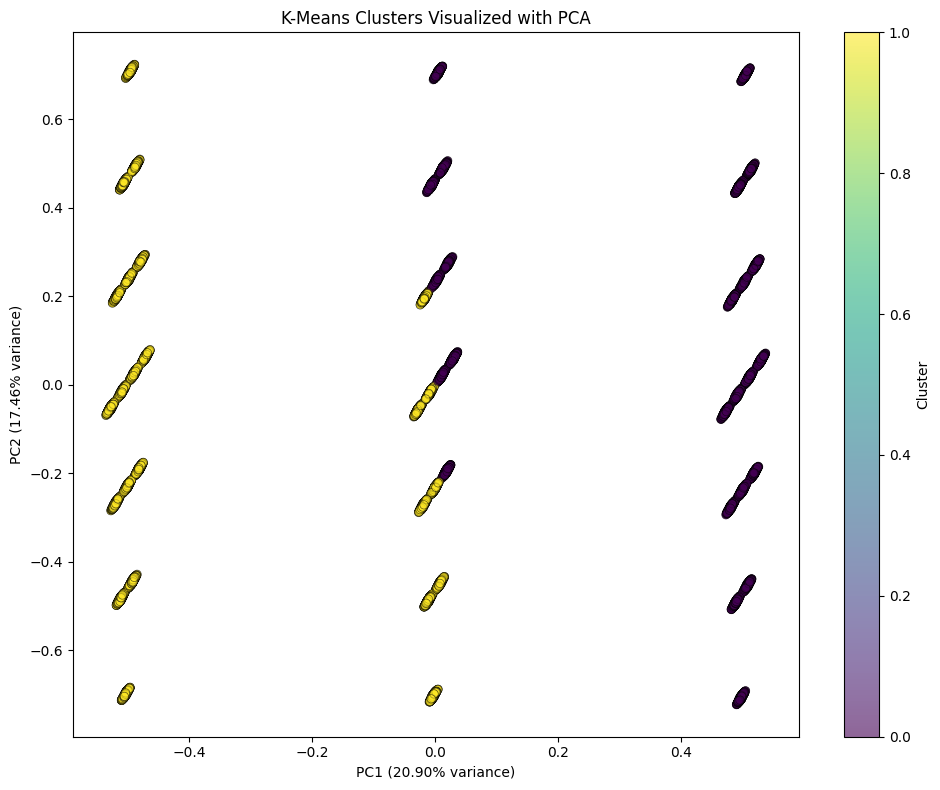

In [10]:
# Cell 7: Visualize Clusters - PCA
print("=" * 80)
print("CLUSTER VISUALIZATION - PCA")
print("=" * 80)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2, random_state=42)
train_pca = pca.fit_transform(train_data)

print(f"\nPCA explained variance ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"  Total: {pca.explained_variance_ratio_.sum():.4f}")

# Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_pca[:, 0], train_pca[:, 1], 
                     c=train_clusters, cmap='viridis', 
                     alpha=0.6, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('K-Means Clusters Visualized with PCA')
plt.tight_layout()
plt.show()

CLUSTER VISUALIZATION - t-SNE

Applying t-SNE on 5000 samples...
t-SNE transformation complete


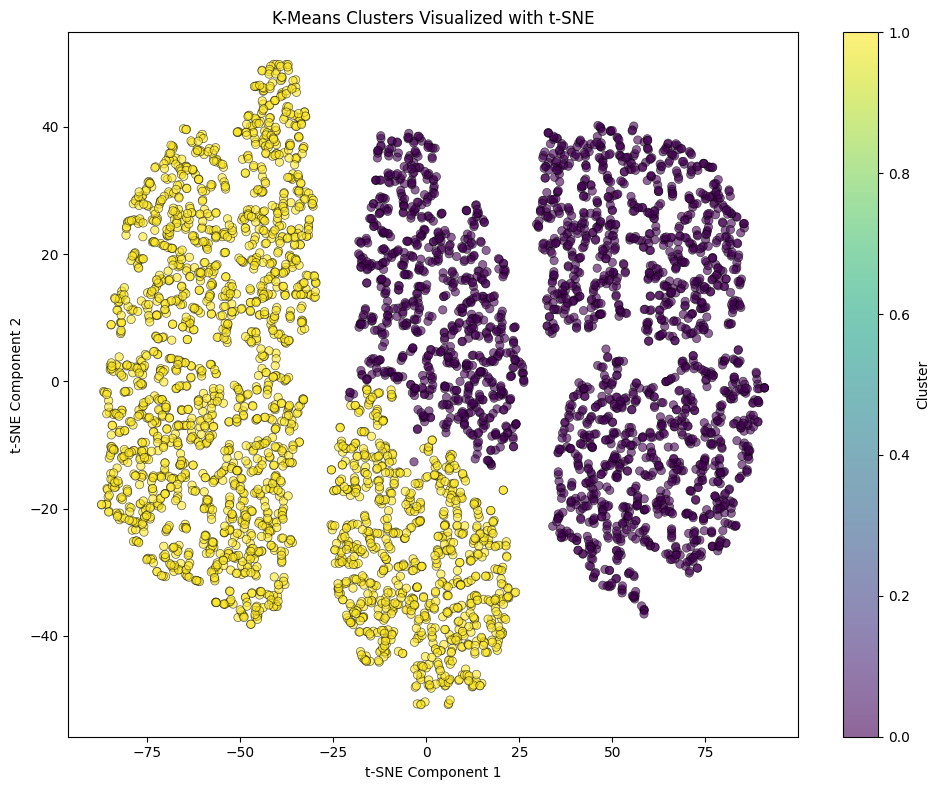

In [11]:
# Cell 8: Visualize Clusters - t-SNE
print("=" * 80)
print("CLUSTER VISUALIZATION - t-SNE")
print("=" * 80)

# Apply t-SNE (on a sample if dataset is large)
sample_size = min(5000, len(train_data))
sample_indices = np.random.choice(len(train_data), sample_size, replace=False)

train_sample = train_data.iloc[sample_indices]
clusters_sample = train_clusters[sample_indices]

print(f"\nApplying t-SNE on {sample_size} samples...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
train_tsne = tsne.fit_transform(train_sample)

print("t-SNE transformation complete")

# Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_tsne[:, 0], train_tsne[:, 1], 
                     c=clusters_sample, cmap='viridis', 
                     alpha=0.6, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-Means Clusters Visualized with t-SNE')
plt.tight_layout()
plt.show()

CLUSTER DISTRIBUTION ACROSS STRESS LEVELS

Cluster vs Stress Level - Counts:


Stress_Level,High,Low,Medium
Cluster,,,
0,5898,5754,5858
1,5797,5758,5935



Cluster vs Stress Level - Percentages (by cluster):


Stress_Level,High,Low,Medium
Cluster,,,
0,33.68,32.86,33.46
1,33.14,32.92,33.93


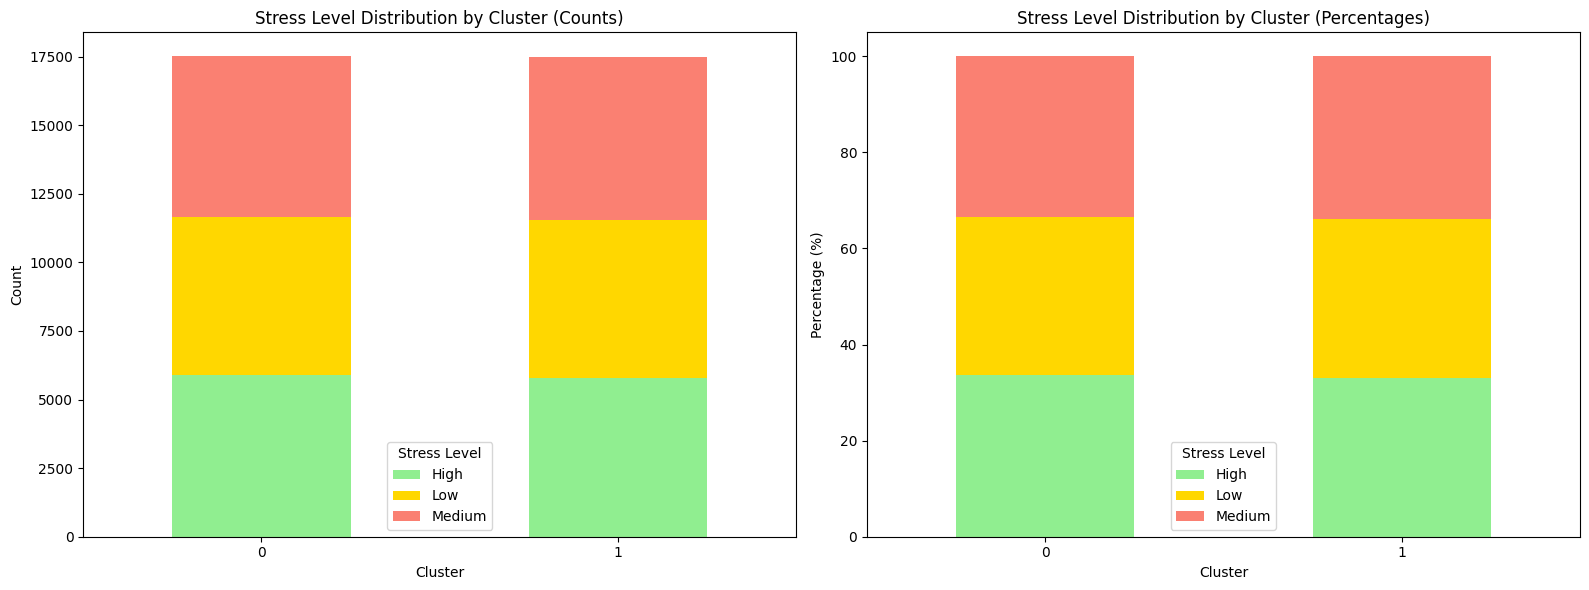

In [13]:
# Cell 9: Analyze Cluster Distribution Across Stress Levels
print("=" * 80)
print("CLUSTER DISTRIBUTION ACROSS STRESS LEVELS")
print("=" * 80)

# Load training target data to analyze stress levels
train_target = pd.read_csv('../data/train/train_lifestyle_target.csv')

# Add cluster labels
train_target['Cluster'] = train_clusters

# Cross-tabulation
print("\nCluster vs Stress Level - Counts:")
crosstab_counts = pd.crosstab(train_target['Cluster'], train_target['Stress_Level'])
display(crosstab_counts)

print("\nCluster vs Stress Level - Percentages (by cluster):")
crosstab_pct = pd.crosstab(train_target['Cluster'], train_target['Stress_Level'], normalize='index') * 100
display(crosstab_pct.round(2))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart - counts
crosstab_counts.plot(kind='bar', stacked=True, ax=axes[0], 
                     color=['lightgreen', 'gold', 'salmon'])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Count')
axes[0].set_title('Stress Level Distribution by Cluster (Counts)')
axes[0].legend(title='Stress Level')
axes[0].tick_params(axis='x', rotation=0)

# Stacked bar chart - percentages
crosstab_pct.plot(kind='bar', stacked=True, ax=axes[1], 
                  color=['lightgreen', 'gold', 'salmon'])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_title('Stress Level Distribution by Cluster (Percentages)')
axes[1].legend(title='Stress Level')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [14]:
# Cell 10: Save Cluster Labels
print("=" * 80)
print("SAVING CLUSTER LABELS")
print("=" * 80)

import os

# Create cluster labels dataframes
train_clusters_df = pd.DataFrame({'Cluster': train_clusters})
val_clusters_df = pd.DataFrame({'Cluster': val_clusters})
test_clusters_df = pd.DataFrame({'Cluster': test_clusters})

# Save cluster labels
train_clusters_df.to_csv('../data/train/cluster_labels.csv', index=False)
val_clusters_df.to_csv('../data/validate/cluster_labels.csv', index=False)
test_clusters_df.to_csv('../data/test/cluster_labels.csv', index=False)

print("\nCluster labels saved:")
print(f"  - ../data/train/cluster_labels.csv ({len(train_clusters)} rows)")
print(f"  - ../data/validate/cluster_labels.csv ({len(val_clusters)} rows)")
print(f"  - ../data/test/cluster_labels.csv ({len(test_clusters)} rows)")

print("\n" + "=" * 80)
print("CLUSTERING ANALYSIS COMPLETE")
print("=" * 80)
print("\nSummary:")
print(f"  - Optimal number of clusters: {optimal_k}")
print(f"  - Silhouette Score: {optimal_score:.4f}")
print(f"  - Training samples clustered: {len(train_clusters)}")
print(f"  - Validation samples clustered: {len(val_clusters)}")
print(f"  - Test samples clustered: {len(test_clusters)}")
print("\nNext Steps:")
print("  - Notebook 04: Merge cluster labels with lifestyle + target data")
print("  - Notebook 04: Build classification model using lifestyle features + cluster labels")

SAVING CLUSTER LABELS

Cluster labels saved:
  - ../data/train/cluster_labels.csv (35000 rows)
  - ../data/validate/cluster_labels.csv (10000 rows)
  - ../data/test/cluster_labels.csv (5000 rows)

CLUSTERING ANALYSIS COMPLETE

Summary:
  - Optimal number of clusters: 2
  - Silhouette Score: 0.1477
  - Training samples clustered: 35000
  - Validation samples clustered: 10000
  - Test samples clustered: 5000

Next Steps:
  - Notebook 04: Merge cluster labels with lifestyle + target data
  - Notebook 04: Build classification model using lifestyle features + cluster labels
